 <center> <h1> <b> Isolated Digit Sound Recognition using DTW and HMM </b> </h1> </center>

<b> In this project, I performed an isolated digit recognition using Dynamic Time Warping (DTW). </br> 
Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation. </b> <br>

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

**Part1**

In this part of the assignment, you need to code the DTW algorithm from scratch. 

1. Given two templates, Write a dynamic time warping algorithm to obtain the optimal distance between them.

> Compute the distance matrix between the two templates 


> Compute the accumulative distance matrix


> Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance   


> Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes



In [2]:
# Distance matrix
def Distance_Matrix(template1,template2):
    Distance_Matrix = np.zeros((len(template1),len(template2)))   # Distance matrix
    for i in range(len(template1)):
        for j in range(len(template2)):
            Distance_Matrix[i,j] = np.linalg.norm(template1[i] - template2[j])**2
    return Distance_Matrix

In [3]:
# DTW Function
def DTW(template1,template2): 
    #######################################################
    # # Code snippet to create the cumulative distance matrix
    #######################################################
    #  Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(template1),len(template2)))   # cummulative distance matrix
    DTW_cumulate_Matrix[0,0] = np.linalg.norm(template1[0] - template2[0])**2
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,len(template1),1): #you can start from 1 
        for j in range(1,len(template2),1):
            current_distance = np.linalg.norm(template1[i] - template2[j])**2     # Compute the euclidean distance between the current feature vectors
            # First Row
            DTW_cumulate_Matrix[0,j] = np.linalg.norm(template1[0] - template2[j])**2 + DTW_cumulate_Matrix[0,j-1]  
            # First columns
            DTW_cumulate_Matrix[i,0] = np.linalg.norm(template1[i] - template2[0])**2 + DTW_cumulate_Matrix[i-1,0] 
            # Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i][j]= current_distance + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    M = len(template1) # length of the template1
    N = len(template2)  # length of the template2
    i = M-1
    j = N-1
    opt_distance = 0.0 # Initial optimal distance
    opt_path = [[i, j]]
    while i!=0 and j!=0 : #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        #You may use "np.argmin for Eucludian (or np.argmax for cosine) " function for doing it
        index =np.argmin([ DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1] ])
        if index == 0 :
            i = i-1
        elif index == 1:
            i = i-1
            j = j-1
        else:
            j = j-1

        #Add the current indexes distance 
        opt_distance = opt_distance + np.linalg.norm(template1[i] - template2[j])**2 # Compute the euclidean distance  of feature vectors  Template1[i] and Template2[j]

        #Store the required indexes to obtain the optimal path 
        opt_path.append([i,j])

    # for last indices, i.e i = M-1 and j = N-1 and for zero indices, i.e i = 0 and j = 0
    opt_distance += np.linalg.norm(template1[M-1] - template2[N-1])**2    # for last indices, i.e i = M-1 and j = N-1
    if i != 0 or j != 0 :
          opt_distance +=  np.linalg.norm(template1[0] - template2[0])**2  # for zero indices, i.e i = 0 and j = 0
          opt_path.append([0,0])
    # Return optimal distance and optimal dtw path
    return opt_distance, opt_path,DTW_cumulate_Matrix

# Function for plotting DTW results
def plotDTWpath(template1,template2):
      #######################################################
      # Inputs : template1 and template2
      # Outputs : plot of optimal path on distance matrix and cumulative distance matrix 
      #######################################################

      #Compute distance and cumulative distance between the given templates 
      #  Initialize the cumulative distance matrix
      DTW_cumulate_Matrix = np.zeros((len(template1),len(template2)))   # cummulative distance matrix
      DTW_cumulate_Matrix[0,0] = np.linalg.norm(template1[0] - template2[0])**2 # Initialize
      #Iterate through the sequence of features in templates and compute the distance between the templates.
      for i in range(1,len(template1),1): #you can start from 1 
          for j in range(1,len(template2),1):
              current_distance = np.linalg.norm(template1[i] - template2[j])**2     # Compute the euclidean distance between the current feature vectors
              # First Row
              DTW_cumulate_Matrix[0,j] = np.linalg.norm(template1[0] - template2[j])**2 + DTW_cumulate_Matrix[0,j-1]  
              # First columns
              DTW_cumulate_Matrix[i,0] = np.linalg.norm(template1[i] - template2[0])**2 + DTW_cumulate_Matrix[i-1,0] 
              # Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
              DTW_cumulate_Matrix[i][j]= current_distance + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])

      #Obtain the optimal path using "DTW" function
      opt_distance, opt_path,DTW_cumulate_Matrix = DTW(template1,template2)
      print("Cumulative Distance Matrix :\n",DTW_cumulate_Matrix)
      distance_matrix = Distance_Matrix(template1,template2)
      print("Distance_Matrix :\n",distance_matrix)
      print("Optimal Path :",opt_path)
      print("optimal path distances : ",[DTW_cumulate_Matrix[i,j] for [i,j] in opt_path])
      print("Optimal Distance :",opt_distance)

      #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
      x_values = [] ; y_values = []
      for [i,j] in opt_path:
          x_values.append(i); y_values.append(j)

      fig, ax = plt.subplots(1,2,figsize=(20,30))
      ax[0].imshow(distance_matrix,cmap=plt.cm.Greens_r, alpha=0.6,origin="lower")
      ax[0].set_title("Distance Matrix", fontsize = 20)
      for i in range(distance_matrix.shape[0]):
          for j in range(distance_matrix.shape[1]):
            ax[0].text(x=j,y=i,s=distance_matrix [i, j], size=15)
      ax[0].plot(y_values,x_values, linewidth = 3, color = 'Blue')
      ax[0].set_xlabel("$Template 2$",size = 16)
      ax[0].set_ylabel("$Template 1$",size = 16)

      ax[1].imshow(DTW_cumulate_Matrix,cmap=plt.cm.Greens_r, alpha=0.6,origin='lower')
      ax[1].set_title("Cumulative Distance Matrix", fontsize = 20)
      for i1 in range(DTW_cumulate_Matrix.shape[0]):
        for j1 in range(DTW_cumulate_Matrix.shape[1]):
          ax[1].text(x=j1,y=i1,s=DTW_cumulate_Matrix[i1, j1], size=15)
      ax[1].plot(y_values,x_values, linewidth = 3, color = 'Blue')
      ax[1].set_xlabel("$Template 2$",size = 16)
      ax[1].set_ylabel("$Template 1$",size = 16)


Cumulative Distance Matrix :
 [[ 1. 10. 19. 23. 32. 33. 33. 33.]
 [ 1. 17. 14. 23. 27. 31. 32. 33.]
 [17.  1. 37. 15. 51. 31. 40. 41.]
 [26. 50.  2. 38. 16. 41. 47. 56.]
 [27. 51.  3. 18. 17. 25. 29. 33.]
 [36. 28. 28.  3. 28. 18. 22. 26.]
 [40. 32. 44.  4. 19. 18. 19. 20.]]
Distance_Matrix :
 [[ 1.  9.  9.  4.  9.  1.  0.  0.]
 [ 0. 16.  4.  9.  4.  4.  1.  1.]
 [16.  0. 36.  1. 36.  4.  9.  9.]
 [ 9. 49.  1. 36.  1. 25. 16. 16.]
 [ 1. 25.  1. 16.  1.  9.  4.  4.]
 [ 9.  1. 25.  0. 25.  1.  4.  4.]
 [ 4.  4. 16.  1. 16.  0.  1.  1.]]
Optimal Path : [[6, 7], [6, 6], [5, 5], [4, 4], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
optimal path distances :  [20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 10.0, 1.0]
Optimal Distance : 20.0


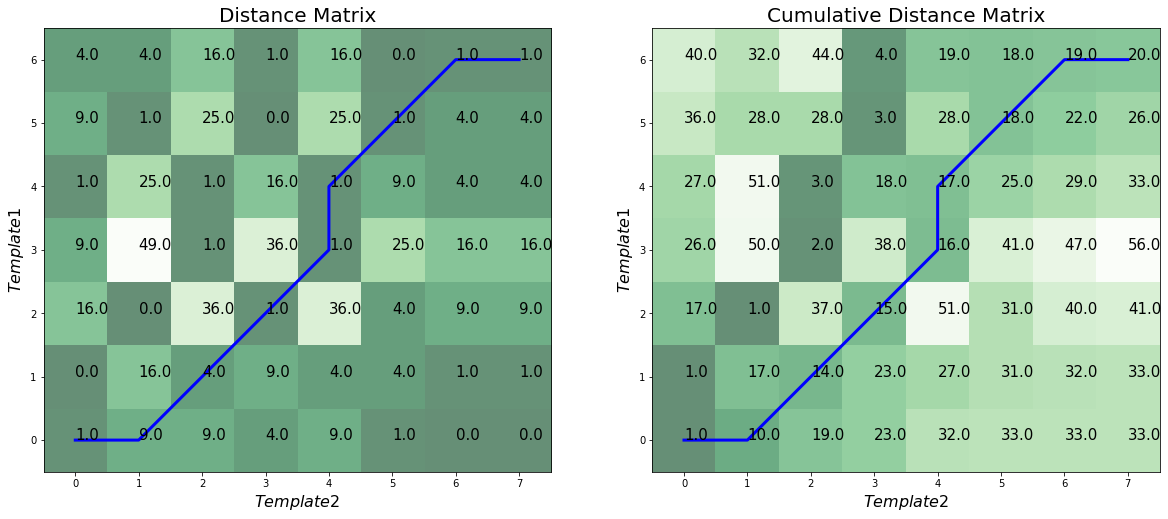

In [4]:
# Here opt_distance should be 20
template1 =np.array([4,3,7,0,2,6,5])
template2 = np.array([3,7,1,6,1,5,4,4]) 
plotDTWpath(template1,template2)

Cumulative Distance Matrix :
 [[ 1.  2.  2.  6.  6.  7.  7. 11.]
 [ 2.  2.  6. 18. 10.  7. 11.  7.]
 [ 2.  2.  3. 12. 11.  7.  8.  8.]
 [ 2.  2.  3. 12. 12.  7.  8.  9.]
 [ 3.  3.  2.  6.  6.  7.  7. 11.]
 [12. 12.  6.  2.  6. 15. 11. 23.]
 [13. 13.  6.  6.  2.  3.  3.  7.]
 [13. 13.  7. 15.  3.  2.  3.  4.]
 [14. 14.  7. 11.  3.  3.  2.  6.]
 [15. 15. 11. 23.  7.  4.  6.  2.]]
Distance_Matrix :
 [[ 1.  1.  0.  4.  0.  1.  0.  4.]
 [ 1.  1.  4. 16.  4.  1.  4.  0.]
 [ 0.  0.  1.  9.  1.  0.  1.  1.]
 [ 0.  0.  1.  9.  1.  0.  1.  1.]
 [ 1.  1.  0.  4.  0.  1.  0.  4.]
 [ 9.  9.  4.  0.  4.  9.  4. 16.]
 [ 1.  1.  0.  4.  0.  1.  0.  4.]
 [ 0.  0.  1.  9.  1.  0.  1.  1.]
 [ 1.  1.  0.  4.  0.  1.  0.  4.]
 [ 1.  1.  4. 16.  4.  1.  4.  0.]]
Optimal Path : [[9, 7], [8, 6], [7, 5], [6, 4], [5, 3], [4, 2], [3, 1], [2, 1], [1, 1], [0, 0]]
optimal path distances :  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0]
Optimal Distance : 2.0


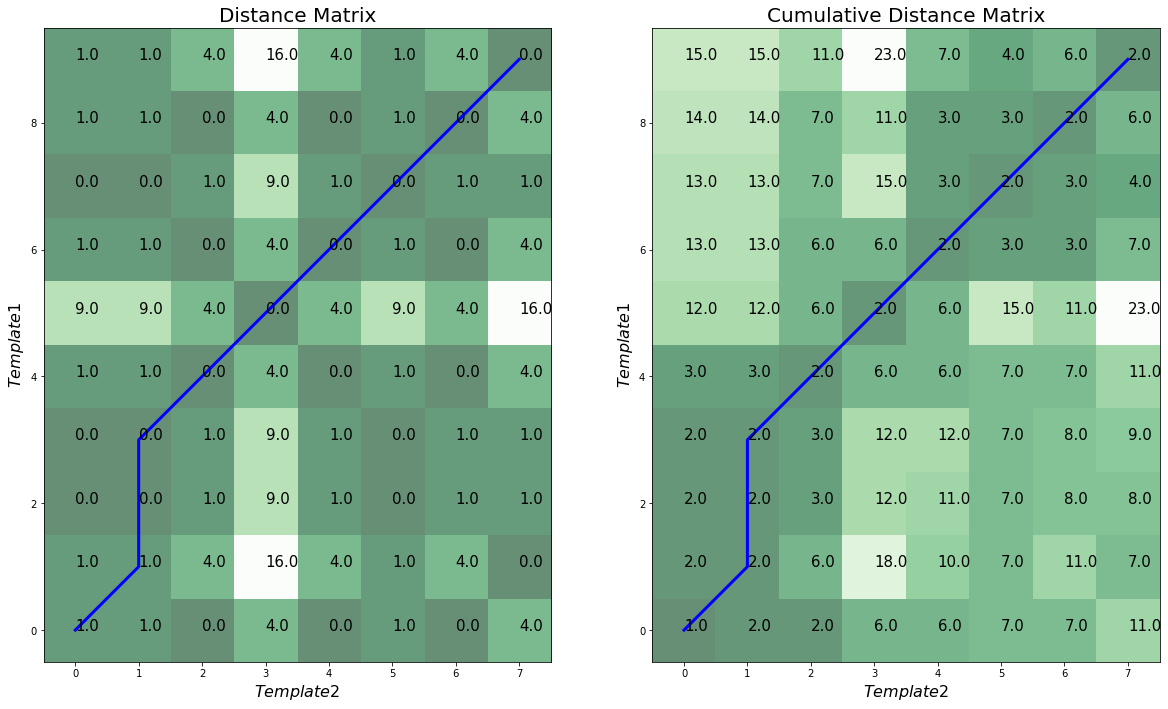

In [5]:
# Here opt_distance should be 2 
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0])
y = np.array([1, 1, 2, 4, 2, 1, 2, 0])
plotDTWpath(x,y)


**Part2**

In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm 

1. Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.
2. Record three further repetitions of the same digits (isolated words) as test data.  
3. The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated word recognition with the help of the DTW codes
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. 
7. Create a confusion matrix and report the most confusing digits. 


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

Record digits

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

for i in range(10):
    print("record %d" %i)
    wav = record(2.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write("record_" + str(i) + ".wav", 16000, fp_arr) #Please change the name.


record 0


<IPython.core.display.Javascript object>

record 1


<IPython.core.display.Javascript object>

record 2


<IPython.core.display.Javascript object>

record 3


<IPython.core.display.Javascript object>

record 4


<IPython.core.display.Javascript object>

record 5


<IPython.core.display.Javascript object>

record 6


<IPython.core.display.Javascript object>

record 7


<IPython.core.display.Javascript object>

record 8


<IPython.core.display.Javascript object>

record 9


<IPython.core.display.Javascript object>

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [10]:
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

In [8]:
pip install python_speech_features


  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=f91c5cf5fd7195490c2acc61203cc81a617eaa39bb20d60a2b5340a7676cd8d0
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [9]:
pip install speechpy

Get_Recordings_of_Digits_0to9

In [12]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
bacground_data_location='/content/drive/My Drive/Colab Notebooks/Recordings_Digits/' #Change this location
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))
record_data_files = np.array(bacground_data_files)


Mounted at /content/drive


In [13]:
print(record_data_files)

['/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_0.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_1.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_2.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_3.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_4.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_5.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_6.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_7.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_8.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record0_9.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record1_0.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record1_1.wav'
 '/content/drive/My Drive/Colab Notebooks/Recordings_Digits/record1_2.wav'
 '/content/drive/My Drive

In [60]:
temp = []
for records in record_data_files:
  features = MFCC(records)
  temp.append(features)

templates = np.array((temp))
print(templates.shape)

(40, 197, 30)


Alternative_for_Upload

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
templates = []
for i in range(4):
    for j in range(10):
      features = MFCC("record" + str(i) +"_" + str(j) + ".wav")
      templates.append(features)

templates = np.array(templates)
print(templates.shape)

**Plot the optimal DTW path**

Text(0, 0.5, '$Template 1$')

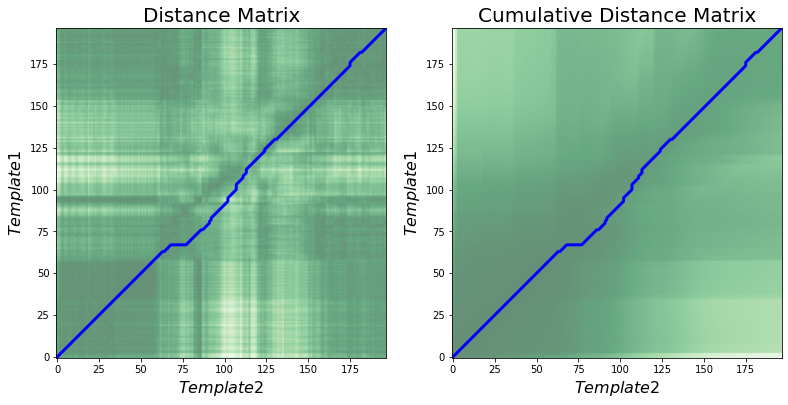

In [15]:
# Both are same
x1 = templates[0] # 0 
y1 = templates[10] # 0

opt_distance, opt_path,DTW_cumulate_Matrix = DTW(x1,y1)
distance_matrix1= Distance_Matrix(x1,y1)
path = np.array((opt_path))

fig, ax = plt.subplots(1,2,figsize=(13,30))
ax[0].imshow(distance_matrix1,cmap=plt.cm.Greens_r, alpha=0.6,origin="lower")
ax[0].set_title("Distance Matrix", fontsize = 20)
ax[0].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[0].set_xlabel("$Template 2$",size = 16)
ax[0].set_ylabel("$Template 1$",size = 16)

ax[1].imshow(DTW_cumulate_Matrix,cmap=plt.cm.Greens_r, alpha=0.6,origin='lower')
ax[1].set_title("Cumulative Distance Matrix", fontsize = 20)
ax[1].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[1].set_xlabel("$Template 2$",size = 16)
ax[1].set_ylabel("$Template 1$",size = 16)


Text(0, 0.5, '$Template 1$')

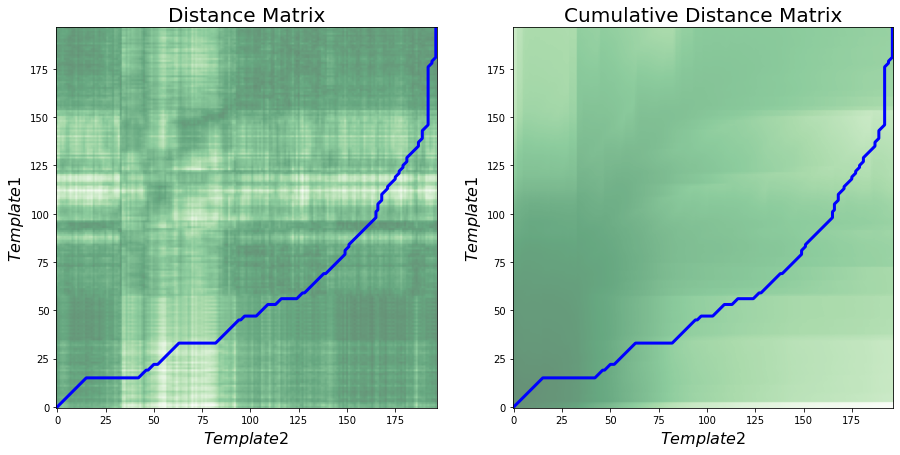

In [16]:
# Both are different 
x2 = templates[0] # 0 
y2 = templates[5] # 5 

opt_distance, opt_path,DTW_cumulate_Matrix = DTW(x2,y2)
distance_matrix2 = Distance_Matrix(x2,y2)
path = np.array((opt_path))

fig, ax = plt.subplots(1,2,figsize=(15,20))
ax[0].imshow(distance_matrix2,cmap=plt.cm.Greens_r, alpha=0.6,origin="lower")
ax[0].set_title("Distance Matrix", fontsize = 20)
ax[0].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[0].set_xlabel("$Template 2$",size = 16)
ax[0].set_ylabel("$Template 1$",size = 16)

ax[1].imshow(DTW_cumulate_Matrix,cmap=plt.cm.Greens_r, alpha=0.6,origin='lower')
ax[1].set_title("Cumulative Distance Matrix", fontsize = 20)
ax[1].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[1].set_xlabel("$Template 2$",size = 16)
ax[1].set_ylabel("$Template 1$",size = 16)


We can see that for same digit we get nearly diagonal otherwise it will be shifted from diagonal.



**Algorithm to perform isolated digit recognition**

In [172]:
def Classify_Digits(templates,test):
  OP_dist = []
  for i in range(10):
    train = templates[i]
    opt_D, path, Accumulative = DTW(train,test)
    OP_dist.append(opt_D)
    pred_digit =  np.argmin(np.array((OP_dist)))
  return opt_D, pred_digit

def Accuracy(N):
    true = []
    predicted=[]
    Correct_count = 0
    for i in range(10,N,1): # only for test data
        test = templates[i]
        true_digit = i % 10  # original digit
        Op_dist, pred =  Classify_Digits(templates,test)
        true.append(true_digit)
        predicted.append(pred)
        if pred == true_digit :
          Correct_count+= 1
        print("Original Digit : " + str(true_digit) + "   Predicted Digit : " + str(pred))
    acc = (Correct_count/(N-10))*100
    true = np.array(true)
    pred = np.array(predicted)
    return acc,true,pred


In [28]:
Acc,true,pred = Accuracy(40)
print("Accuracy : ",Acc)

Original Digit : 0   Predicted Digit : 0
Original Digit : 1   Predicted Digit : 1
Original Digit : 2   Predicted Digit : 2
Original Digit : 3   Predicted Digit : 3
Original Digit : 4   Predicted Digit : 4
Original Digit : 5   Predicted Digit : 5
Original Digit : 6   Predicted Digit : 6
Original Digit : 7   Predicted Digit : 7
Original Digit : 8   Predicted Digit : 8
Original Digit : 9   Predicted Digit : 9
Original Digit : 0   Predicted Digit : 0
Original Digit : 1   Predicted Digit : 1
Original Digit : 2   Predicted Digit : 2
Original Digit : 3   Predicted Digit : 3
Original Digit : 4   Predicted Digit : 4
Original Digit : 5   Predicted Digit : 5
Original Digit : 6   Predicted Digit : 6
Original Digit : 7   Predicted Digit : 7
Original Digit : 8   Predicted Digit : 8
Original Digit : 9   Predicted Digit : 8
Original Digit : 0   Predicted Digit : 0
Original Digit : 1   Predicted Digit : 1
Original Digit : 2   Predicted Digit : 2
Original Digit : 3   Predicted Digit : 3
Original Digit :

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [29]:
def Confusion_Matrix(true, pred):
  N = len(np.unique(true)) # no. of digits
  confuse_mat = np.zeros((N,N))
  for i in range(len(true)):
    confuse_mat[true[i]][pred[i]] += 1
  return confuse_mat

Confusion Matrix : 
 [[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]]


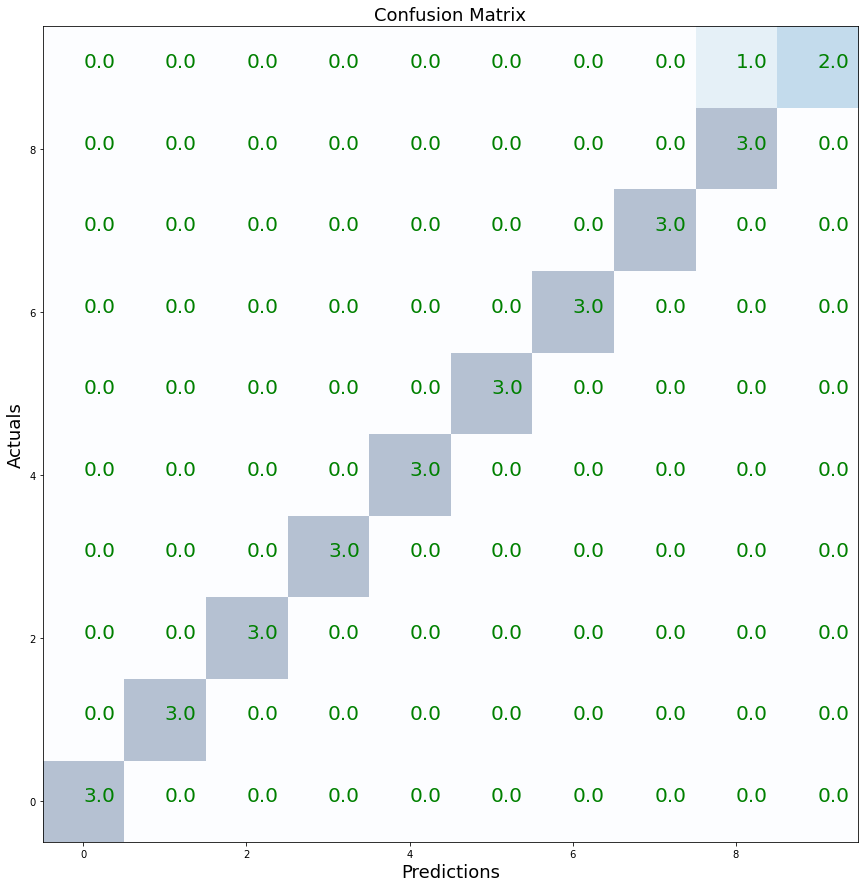

In [32]:
conf_matrix= Confusion_Matrix(true,pred)
print('Confusion Matrix : \n',conf_matrix)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3,origin = "lower")
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j],color = "green",size=20)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


**Part3**

In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. 
3. Please report some of the changes to improve the system performance.

In [44]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
bacground_data_location='/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/' #Change this location
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))
background_data_files = np.array(bacground_data_files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
print(background_data_files.shape)
background_data_files.sort()
print(background_data_files)

(1999,)
['/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_jackson_10.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_jackson_11.wav'
 ...
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/9_yweweler_7.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/9_yweweler_8.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/9_yweweler_9.wav']


In [49]:
## Iterate through the files and load them using "sig,sr = sf.read(filename)""
sig, st = sf.read(bacground_data_files[1])
print(sig.shape,st)

(4788,) 8000


In [78]:
def cum_dist_matrix(template1, template2):
    #######################################################
    # # Code snippet to create the cumulative distance matrix
    #######################################################
    #  Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(template1),len(template2)))   # cummulative distance matrix
    DTW_cumulate_Matrix[0,0] = np.linalg.norm(template1[0] - template2[0])**2
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,len(template1),1): #you can start from 1 
        for j in range(1,len(template2),1):
            current_distance = np.linalg.norm(template1[i] - template2[j])**2     # Compute the euclidean distance between the current feature vectors
            # First Row
            DTW_cumulate_Matrix[0,j] = np.linalg.norm(template1[0] - template2[j])**2 + DTW_cumulate_Matrix[0,j-1]  
            # First columns
            DTW_cumulate_Matrix[i,0] = np.linalg.norm(template1[i] - template2[0])**2 + DTW_cumulate_Matrix[i-1,0] 
            # Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i][j]= current_distance + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
    return DTW_cumulate_Matrix

def opt_distance(x,y):
  return cum_dist_matrix(x,y)[len(y)-1, len(x)-1]

try IMP

In [305]:
temp0 = []
for i in range(10):
  temp0.append(background_data_files[i*200])
temp0 = np.array(temp0)
print(temp0)


['/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/1_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/2_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/3_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/4_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/5_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/6_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/7_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/8_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/9_jackson_1.wav']


In [317]:
temp_last = []
for i in range(0,1999,200):
  for j in range(4):
      temp_last.append(background_data_files[j*50+i])

temp_last = np.array((temp_last))
print(temp_last)

['/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_nicolas_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_theo_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_yweweler_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/1_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/1_nicolas_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/1_theo_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/1_yweweler_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/2_jackson_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/2_nicolas_1.wav'
 '/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/2_theo_1.wav'
 '/content/drive/MyDrive/Col

Since we implimented DTW is very slow, I am using inbuilt fast DTW here

In [259]:
!pip install dtaidistance
from dtaidistance import dtw

     |████████████████████████████████| 797 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.6-cp37-cp37m-linux_x86_64.whl size=1593658 sha256=818a4241fca9012914bcbd516eaf45d00626bd8411a4658ee39e7fcb96c03c31
  Stored in directory: /root/.cache/pip/wheels/a4/04/e5/ff7fd821276e7ec68893652d36b6a13f230ecdcafdc3283b3f
Successfully built dtaidistance


In [354]:
def digit_Classify_fin(temp0,rec):
  vec = np.zeros(10)
  for i in range(10):
    sig, sr = sf.read(temp0[i])
    vec[i] = dtw.distance_fast(sig,rec)
    pred_digit = np.argmin(vec)
  return pred_digit

confusion_matrix = np.zeros((10,10))
def Accuracy_fin(N,temp_last):
    true = []
    predicted=[]
    Correct_count = 0
    for i in range(N): # only for test data
        test ,sr = sf.read(temp_last[i])
        true_digit = i // 4  # original digit
        pred =  digit_Classify_fin(temp0,test)
        confusion_matrix[true_digit,pred] += 1
        true.append(true_digit)
        predicted.append(pred)
        if pred == true_digit :
          Correct_count+= 1
        print("Original Digit : " + str(true_digit) + "   Predicted Digit : " + str(pred))
    acc = (Correct_count/(N))*100
    true = np.array(true)
    pred = np.array(predicted)
    return acc,true,pred


In [355]:
acc,true,pred = Accuracy_fin(40,temp_last)
print("Accuracy :",acc)

Original Digit : 0   Predicted Digit : 0
Original Digit : 0   Predicted Digit : 9
Original Digit : 0   Predicted Digit : 9
Original Digit : 0   Predicted Digit : 9
Original Digit : 1   Predicted Digit : 1
Original Digit : 1   Predicted Digit : 9
Original Digit : 1   Predicted Digit : 9
Original Digit : 1   Predicted Digit : 9
Original Digit : 2   Predicted Digit : 2
Original Digit : 2   Predicted Digit : 8
Original Digit : 2   Predicted Digit : 9
Original Digit : 2   Predicted Digit : 9
Original Digit : 3   Predicted Digit : 3
Original Digit : 3   Predicted Digit : 8
Original Digit : 3   Predicted Digit : 9
Original Digit : 3   Predicted Digit : 9
Original Digit : 4   Predicted Digit : 4
Original Digit : 4   Predicted Digit : 8
Original Digit : 4   Predicted Digit : 9
Original Digit : 4   Predicted Digit : 9
Original Digit : 5   Predicted Digit : 5
Original Digit : 5   Predicted Digit : 8
Original Digit : 5   Predicted Digit : 9
Original Digit : 5   Predicted Digit : 9
Original Digit :

Confusion Matrix : [[1. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 2.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 2.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 2.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 2.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]]


Text(0.5, 1.0, 'Confusion Matrix')

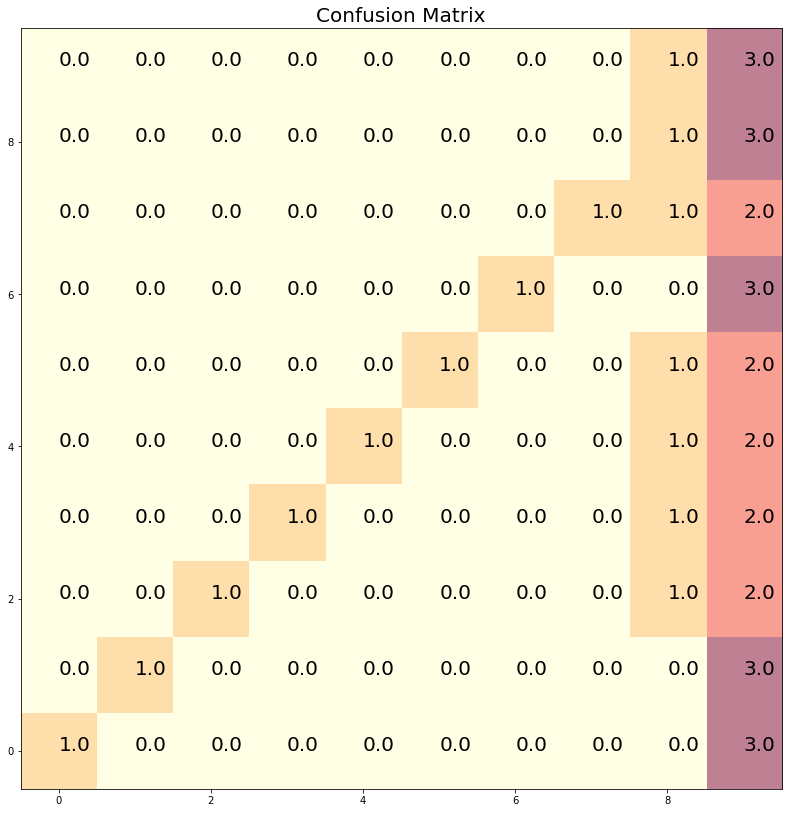

In [357]:
print("Confusion Matrix :",confusion_matrix)

fig, px = plt.subplots(figsize=(20, 14))
px.imshow(confusion_matrix, cmap=plt.cm.YlOrRd, alpha=0.5,origin = 'lower')
for i1 in range(confusion_matrix.shape[0]):
  for j1 in range(confusion_matrix.shape[1]):
    px.text(x=j1,y=i1,s=confusion_matrix[i1, j1], size=20)
px.set_title("Confusion Matrix", fontsize = 20)

Part_2

In [363]:
from fastdtw import fastdtw
template1 = temp_last[0]
template2 = temp_last[3]



In [381]:
# Same Speaker : Jackson
sig1,sr1 = sf.read(bacground_data_files[0])
sig2,sr2 = sf.read(bacground_data_files[10])

Text(0, 0.5, '$Template 1$')

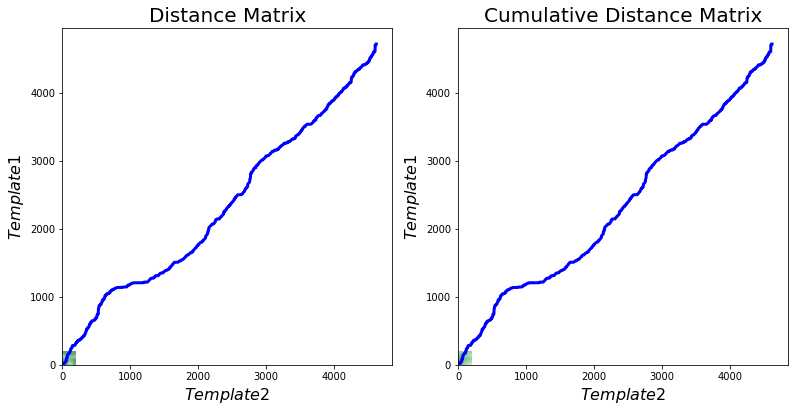

In [384]:
# Both are same

template1 = sig1
template2 = sig2

dist = lambda template1,template2: np.linalg.norm(template1-template2)**2
distance, path = fastdtw(template1,template2, dist=dist)

path = np.array((path))

fig, ax = plt.subplots(1,2,figsize=(13,30))
ax[0].imshow(distance_matrix1,cmap=plt.cm.Greens_r, alpha=0.6,origin="lower")
ax[0].set_title("Distance Matrix", fontsize = 20)
ax[0].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[0].set_xlabel("$Template 2$",size = 16)
ax[0].set_ylabel("$Template 1$",size = 16)

ax[1].imshow(DTW_cumulate_Matrix,cmap=plt.cm.Greens_r, alpha=0.6,origin='lower')
ax[1].set_title("Cumulative Distance Matrix", fontsize = 20)
ax[1].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[1].set_xlabel("$Template 2$",size = 16)
ax[1].set_ylabel("$Template 1$",size = 16)

In [372]:
# Different Speaker : Jackson and Yweweler
sig1,sr1 = sf.read(temp_last[0])
sig2,sr2 = sf.read(temp_last[15])
print(temp_last[0])
print(temp_last[15])

/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/0_jackson_1.wav
/content/drive/MyDrive/Colab Notebooks/Data_All/MultiSpeakerDigitData/3_yweweler_1.wav


Text(0, 0.5, '$Template 1$')

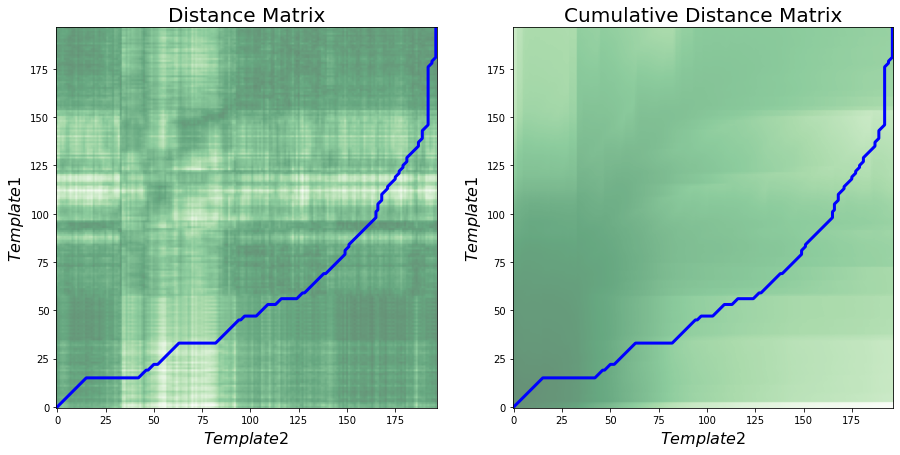

In [373]:
# Both are different 
template1 = sig1 # 0 
template2 = sig2 # 3

dist = lambda template1,template2: np.linalg.norm(template1-template2)**2
distance, path = fastdtw(template1,template2, dist=dist)

path = np.array((opt_path))

fig, ax = plt.subplots(1,2,figsize=(15,20))
ax[0].imshow(distance_matrix2,cmap=plt.cm.Greens_r, alpha=0.6,origin="lower")
ax[0].set_title("Distance Matrix", fontsize = 20)
ax[0].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[0].set_xlabel("$Template 2$",size = 16)
ax[0].set_ylabel("$Template 1$",size = 16)

ax[1].imshow(DTW_cumulate_Matrix,cmap=plt.cm.Greens_r, alpha=0.6,origin='lower')
ax[1].set_title("Cumulative Distance Matrix", fontsize = 20)
ax[1].plot(path[:,0],path[:,1],linewidth = 3, color = 'Blue')
ax[1].set_xlabel("$Template 2$",size = 16)
ax[1].set_ylabel("$Template 1$",size = 16)


We can see that for same speaker and same digit we get nearly diagonal otherwise it will be shifted from diagonal.

Part_3

We can already see that our implimented DTW is very slow for large data sets. Also we can see from above plots for same speaker and same digit too we are getting somewhat high optimal distance means for different speaker and different digit this distance will be very high. SO we have to look for other algo which will be not affected by variations in speech pattern. We can use HMM here for improvment as well as for high accuracy.